<a href="https://colab.research.google.com/github/PiyushGithub24/MACHINE_LEARNING_BY_PIYUSH_KUMAR/blob/main/Random_Sample_Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Sample Imputation :--

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [52]:
df=pd.read_csv("train.csv" ,usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [53]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [54]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [55]:
X=df.drop("Survived",axis=1)
Y=df["Survived"]

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [57]:
X_train["Age_imputed"]=X_train["Age"]
X_test["Age_imputed"]=X_test["Age"]

In [58]:
X_train.sample(5)

,Age,Fare,Age_imputed
173,21.0,7.9250,21.0
339,45.0,35.5000,45.0
800,34.0,13.0000,34.0
138,16.0,9.2167,16.0
180,NaN,69.5500,NaN


In [59]:
X_train["Age_imputed"][X_train["Age_imputed"].isnull()]

29    NaN
55    NaN
533   NaN
495   NaN
468   NaN
       ..
330   NaN
214   NaN
466   NaN
121   NaN
270   NaN
Name: Age_imputed, Length: 140, dtype: float64

In [60]:
X_train["Age"].dropna()

331    45.5
733    23.0
382    32.0
704    26.0
813     6.0
       ... 
71     16.0
106    21.0
860    41.0
435    14.0
102    21.0
Name: Age, Length: 572, dtype: float64

In [61]:
X_train.isnull().sum()

Age            140
Fare             0
Age_imputed    140
dtype: int64

In [62]:
X_train["Age"].dropna().sample(X_train["Age"].isnull().sum()).values

array([28.  , 34.  , 45.  , 29.  , 50.  , 32.  , 19.  , 33.  , 55.5 ,
       30.  , 17.  , 36.  ,  0.83, 27.  , 26.  , 34.  , 27.  , 26.  ,
       24.  , 25.  , 26.  , 33.  , 24.  , 44.  , 35.  , 19.  , 46.  ,
       48.  , 19.  , 54.  ,  4.  , 54.  , 28.  , 39.  , 35.  , 56.  ,
        0.67, 25.  , 27.  , 33.  , 34.  , 30.  , 34.  , 17.  , 70.  ,
       34.  , 32.  ,  8.  , 35.  , 27.  , 19.  ,  1.  , 15.  , 17.  ,
       21.  , 52.  , 28.  , 24.  , 17.  , 25.  , 29.  , 62.  , 41.  ,
        2.  , 39.  , 24.  , 17.  , 34.  , 28.5 , 24.  , 20.  ,  0.75,
       28.  , 43.  , 36.  ,  6.  , 40.  , 62.  , 28.  , 54.  , 18.  ,
       35.  , 18.  , 49.  , 26.  , 19.  , 45.5 , 36.  , 30.  , 25.  ,
       46.  , 22.  , 40.  , 22.  , 14.  , 20.  , 28.  , 26.  ,  2.  ,
        3.  , 21.  ,  7.  ,  5.  , 32.  , 31.  , 58.  , 16.  , 38.  ,
       30.  , 16.  , 26.  , 36.  , 24.  , 34.  , 21.  , 29.  , 27.  ,
       25.  , 17.  , 33.  , 19.  ,  2.  , 30.  , 26.  , 18.  , 38.  ,
       23.  , 24.5 ,

In [63]:
X_train["Age"].dropna().sample(X_train["Age"].isnull().sum()).values.shape

(140,)

In [64]:
X_train["Age_imputed"][X_train["Age_imputed"].isnull()]=X_train["Age"].dropna().sample(X_train["Age"].isnull().sum()).values
X_test["Age_imputed"][X_test["Age_imputed"].isnull()]=X_test["Age"].dropna().sample(X_test["Age"].isnull().sum()).values

In [65]:
X_train.isnull().sum()

Age            140
Fare             0
Age_imputed      0
dtype: int64

In [66]:
X_train.sample(10)

,Age,Fare,Age_imputed
846,NaN,69.5500,4.0
122,32.5,30.0708,32.5
420,NaN,7.8958,25.0
340,2.0,26.0000,2.0
332,38.0,153.4625,38.0
279,35.0,20.2500,35.0
337,41.0,134.5000,41.0
104,37.0,7.9250,37.0
609,40.0,153.4625,40.0
800,34.0,13.0000,34.0


##Ploting the distribution plot :-

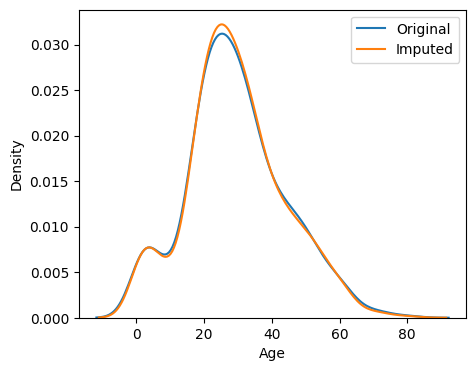

In [67]:
plt.figure(figsize=(5,4))
sns.kdeplot(X_train["Age"],label="Original")
sns.kdeplot(X_train["Age_imputed"],label="Imputed")
plt.legend()
plt.show()


##Check the variances :--

In [68]:
print(f"Original Variable Variance : {X_train['Age'].var()}")
print(f"Imputed Variable Variance after random imputation : {X_train['Age_imputed'].var()}")

Original Variable Variance : 210.2517072477435
Imputed Variable Variance after random imputation : 202.7167107602838


In [69]:
X_train[["Fare","Age_imputed","Age"]].cov()

,Fare,Age_imputed,Age
Fare,2700.831981,52.550765,71.580633
Age_imputed,52.550765,202.716711,210.251707
Age,71.580633,210.251707,210.251707


In [70]:
X_train.cov()

,Age,Fare,Age_imputed
Age,210.251707,71.580633,210.251707
Fare,71.580633,2700.831981,52.550765
Age_imputed,210.251707,52.550765,202.716711


##ploting the box plots :-

<Axes: >

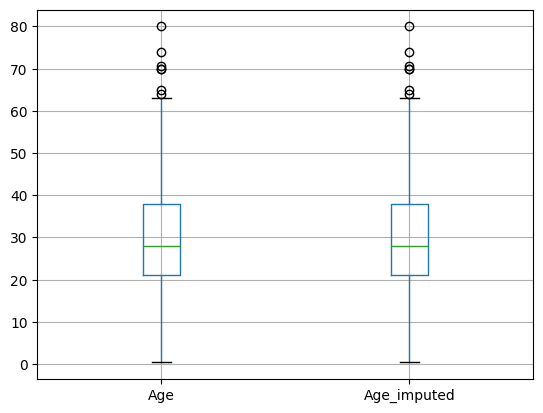

In [71]:
X_train[["Age","Age_imputed"]].boxplot()

In [72]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))


In [73]:
data = pd.read_csv('House_Train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [74]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [75]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [76]:
X = data
y = data['SalePrice']

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [78]:
X_train.head()

,FireplaceQu,GarageQual,SalePrice
455,TA,TA,175500
863,NaN,TA,132500
504,Fa,TA,147000
1413,Gd,TA,257000
1389,Gd,TA,131000


In [79]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [80]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
876,NaN,TA,132250,TA,NaN
1180,NaN,TA,250000,TA,NaN
116,Po,TA,139000,TA,Po
758,NaN,TA,179400,TA,NaN
1010,Gd,TA,135000,TA,Gd


In [81]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

<ipython-input-81-f5eeca8d3074>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
<ipython-input-81-f5eeca8d3074>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
<ipython-input-81-f5eeca8d3074>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

In [82]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [83]:
temp

,original,imputed
TA,0.951043,0.953767
Fa,0.037171,0.035103
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [84]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.653199
TA,0.412439,0.536476
Fa,0.040917,0.053872
Po,0.027823,0.035915
Ex,0.024550,0.031425


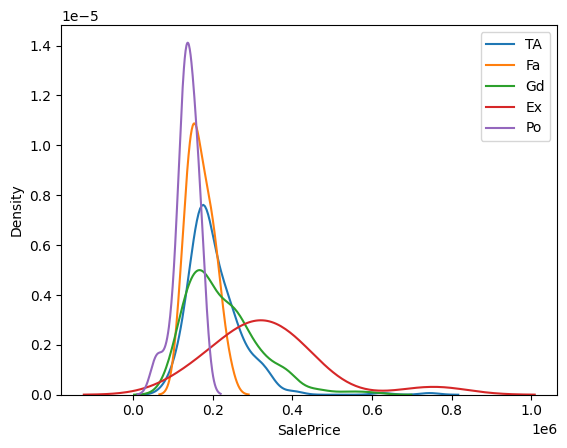

In [87]:
# plt.figure(figsize=(5,4))
# for category in X_train["GarageQual"].dropna().unique():
#   sns.kdeplot(X_train[X_train["GarageQual"]==category]["SalePrice"],label=category)

# plt.legend()
# plt.show()

for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],label=category)

plt.legend ()
plt.show()

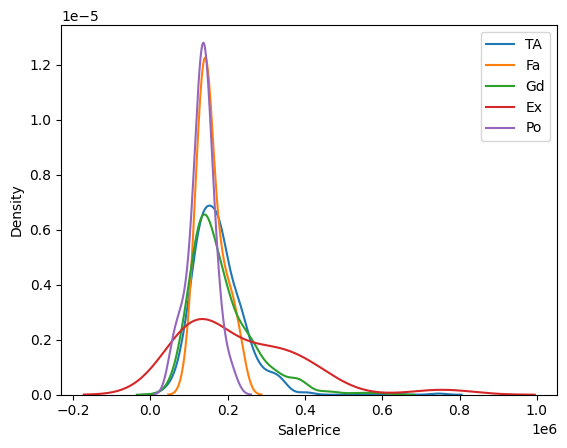

In [86]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label=category)

plt.legend ()
plt.show()